# <span style="color:black"> LSN-Esercitazione numerica 1</span>


## <span style="color:blue">  Esercizio 01.1</span>

In [1]:
import matplotlib
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.gridspec as gridspec

Ho testato il generatore di numeri causali fornito nello studio con la valutazione dell'integrale $ \int_0^1 r dr = 1/2 = \langle r \rangle$. 

Si descrivono i risultati e le loro incertezze atraverso il metodo del Data-Blocking utilizzando 100 blocchi, ognuno contenente 1000 estrazione casuali. 

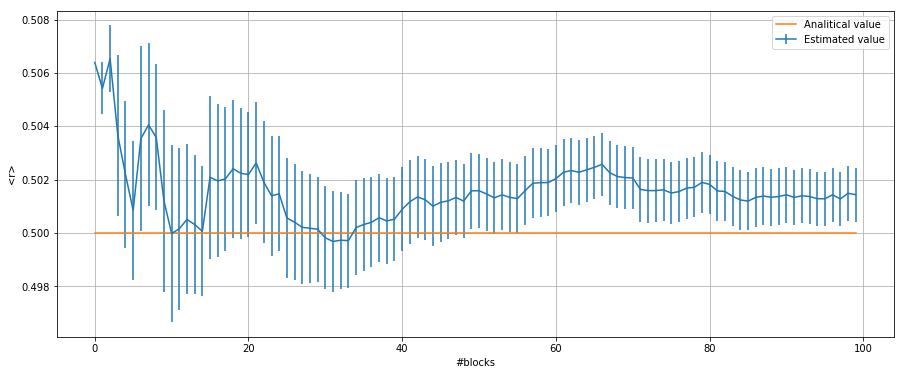

In [2]:
x, sum_prog, err_prog = np.loadtxt('Es01.1.1.res', usecols=(0,1,2), unpack='true')
plt.figure(figsize=(15,6))
plt.errorbar(x,sum_prog,yerr=err_prog, label="Estimated value")
plt.plot(x, 0.5-x+x, label="Analitical value")
plt.xlabel('#blocks')
plt.ylabel('<r>')
plt.grid(True)
plt.legend()
plt.show()

Il valore analitico è al di fuori delle barre di errore del valore stimato, ma è evidente la consistenza statistica dei risultati: il valore analitico è sempre all'interno di $2\sigma$ negli ultimi 20 blocchi.

Ho ora studiato l'integrale $\int_0^1 (r-1/2)^2 dr = 1/12 = \sigma^2$

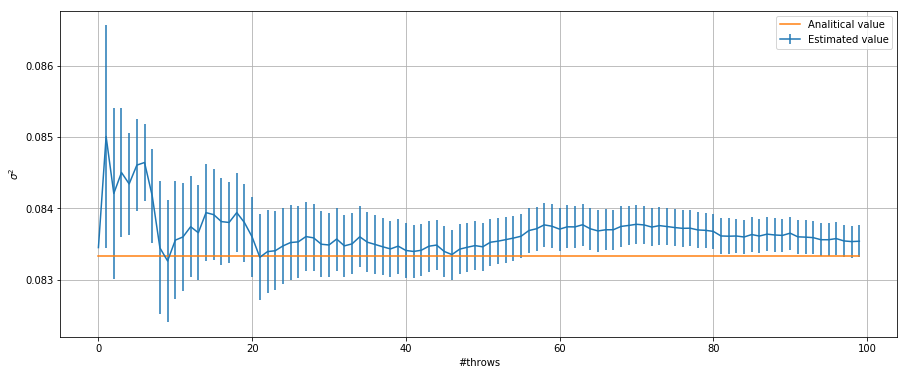

In [3]:
x, sum_prog, err_prog = np.loadtxt('Es01.1.2.res', usecols=(0,1,2), unpack='true')
plt.figure(figsize=(15,6))
plt.errorbar(x,sum_prog,yerr=err_prog, label="Estimated value")
plt.plot(x, 1/12-x+x, label="Analitical value")
plt.xlabel('#throws')
plt.ylabel('$\sigma^2$')
plt.grid(True)
plt.legend()
plt.show()

Ho diviso l'intervallo $[0,1]$ in 100 sottointervalli identici e ho implementato il test del $\chi^2$:
$$\chi^2 = \sum_{i=1}^M \frac{\left( n_i - n/M \right)^2}{n/M}$$
Ho estratto 10000 numeri casuali nell'intervallo per 100 volte.
Ci si aspetta che $(n_i - n/M)^2 \simeq n/M$ e perciò $\chi^2 \simeq 100$.

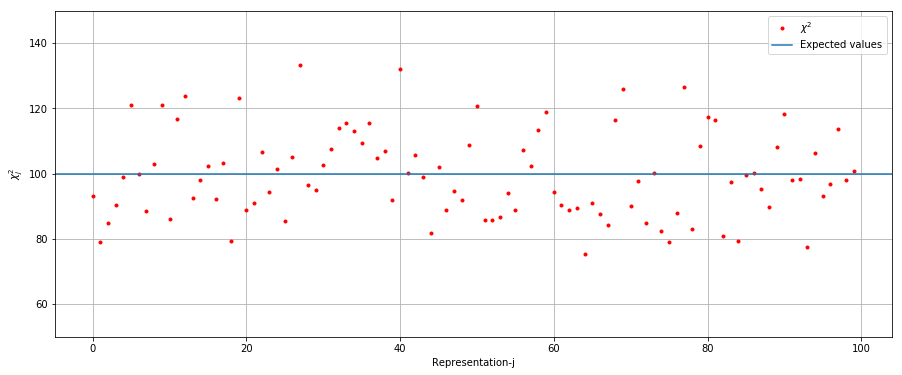

In [4]:
x, chi2 = np.loadtxt('Es01.1.3.res', usecols=(0,1), unpack='true')
plt.figure(figsize=(15,6))
plt.plot(x, chi2, 'r.', label="$\chi^2$")
plt.axhline(y=100, xmin=0, xmax=100, label="Expected values")
plt.plot()
plt.xlabel('Representation-j')
plt.ylabel('$\chi^2_j$')
plt.ylim(50,150)
plt.grid(True)
plt.legend()
plt.show()

I valori ottenuti sono distribuiti attorno al valore atteso: si conclude che il generatore di numeri causali opera in modo corretto.

## <span style="color:blue">  Esercizio 01.2</span>


Ho campionato le distribuzioni:
* esponenziale $p(x) = \lambda \exp(-\lambda x)$ per $x\in [0;+\infty]$ ;
* Cauchy_Lorentz $p(x)=\frac{1}{\pi}\frac{\Gamma}{(x-\mu)^2+\Gamma^2}$ con $x\in [-\infty;+\infty]$,

utilizzando il **metodo dell'inversione della distribuzione cumulativa**.
Ho aggiunto due funzioni pubbliche *Exp(lambda)* e *Lorentz(gamma, mu)* nella classe Random che descrivessero punti generati secondo tali distribuzioni.
$$
e=-\frac{ln(1-x)}{\lambda}
$$
$$
l=\mu+\Gamma \mathrm {tan}\left[\pi\left(x-\frac{1}{2}\right)\right]
$$
I due valori sono distribuiti secondo la distribuzione esponenziale e di Cauchy-Lorentz con $x$ distribuito uniformente nell'intervallo unitario.

Ho studiato  un *dado standard*, un *dado esponenziale* con $\lambda=1$ e un *dado lorentziano* con $\mu=0$  e $\sigma=1$ e ho vautato $S_N = \frac{1}{N}\sum_{i=1}^N x_i$ per $N=1, 2, 10, 100$.

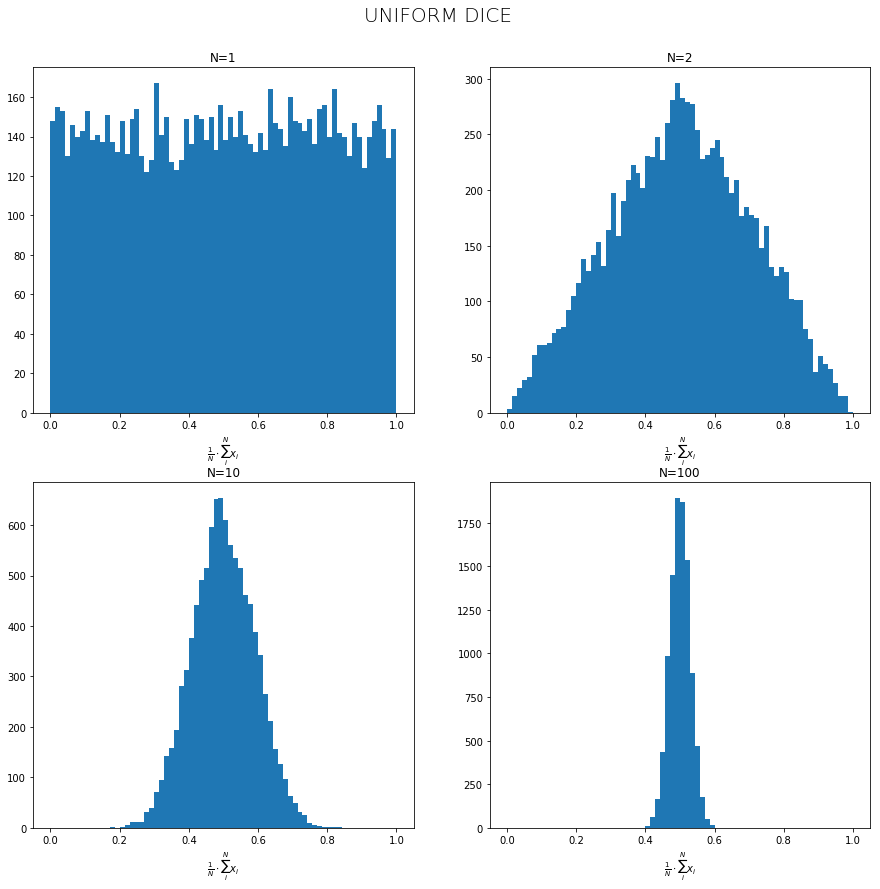

In [5]:
fig = plt.figure(figsize=(15, 14))
fig.suptitle('UNIFORM DICE', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)

S1,S2, S10, S100 = np.loadtxt('Es01.2.1.res', usecols=(0,1,2,3), unpack='true')

ax1 = fig.add_subplot(gs[0,0])
n_bins=70
ax1.hist(S1, n_bins, range=[0,1])
ax1.set_title('N=1')
#axes[0,0].set(xlim=[0,1])
ax1.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

ax2 = fig.add_subplot(gs[0,1])
ax2.hist(S2, n_bins, range=[0,1])
ax2.set_title('N=2')
#axes[0,1].set(xlim=[0,1])
ax2.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

ax3 = fig.add_subplot(gs[1,0])
ax3.hist(S10, n_bins,  range=[0,1])
ax3.set_title('N=10')
#axes[1,0].set(xlim=[0,1])
ax3.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

ax4 = fig.add_subplot(gs[1,1])
ax4.hist(S100, n_bins,  range=[0,1])
ax4.set_title('N=100')
#axes[1,1].set(xlim=[0,1])
ax4.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

plt.show()

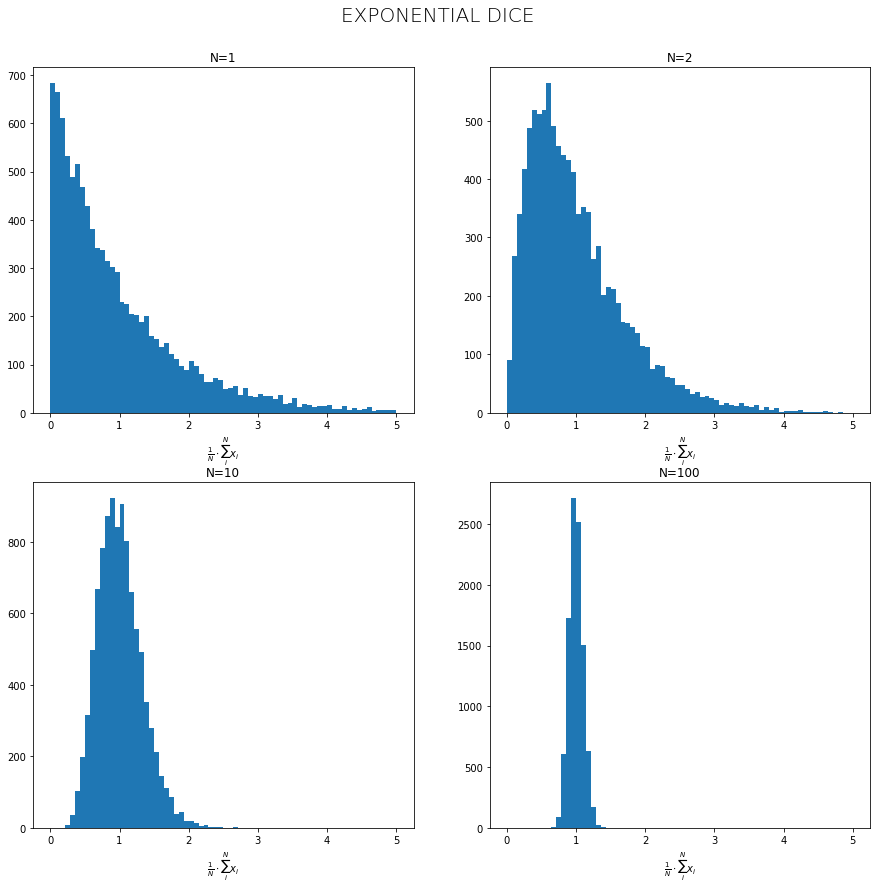

In [6]:
E1,E2, E10, E100 = np.loadtxt('Es01.2.2.res', usecols=(0,1,2,3), unpack='true')

fig = plt.figure(figsize=(15, 14))
fig.suptitle('EXPONENTIAL DICE', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)

n_bins=70
ax1 = fig.add_subplot(gs[0,0])
ax1.hist(E1, n_bins,  range=[0,5])
ax1.set_title('N=1')
#axes[0,0].set(xlim=[0,5])
ax1.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

ax2 = fig.add_subplot(gs[0,1])
ax2.hist(E2, n_bins, range=[0,5])
ax2.set_title('N=2')
#axes[0,1].set(xlim=[0,5])
ax2.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

ax3 = fig.add_subplot(gs[1,0])
ax3.hist(E10, n_bins, range=[0,5])
ax3.set_title('N=10')
#axes[1,0].set(xlim=[0,5])
ax3.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

ax4 = fig.add_subplot(gs[1,1])
ax4.hist(E100, n_bins,  range=[0,5])
ax4.set_title('N=100')
#axes[1,1].set(xlim=[0,5])
ax4.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

plt.show()

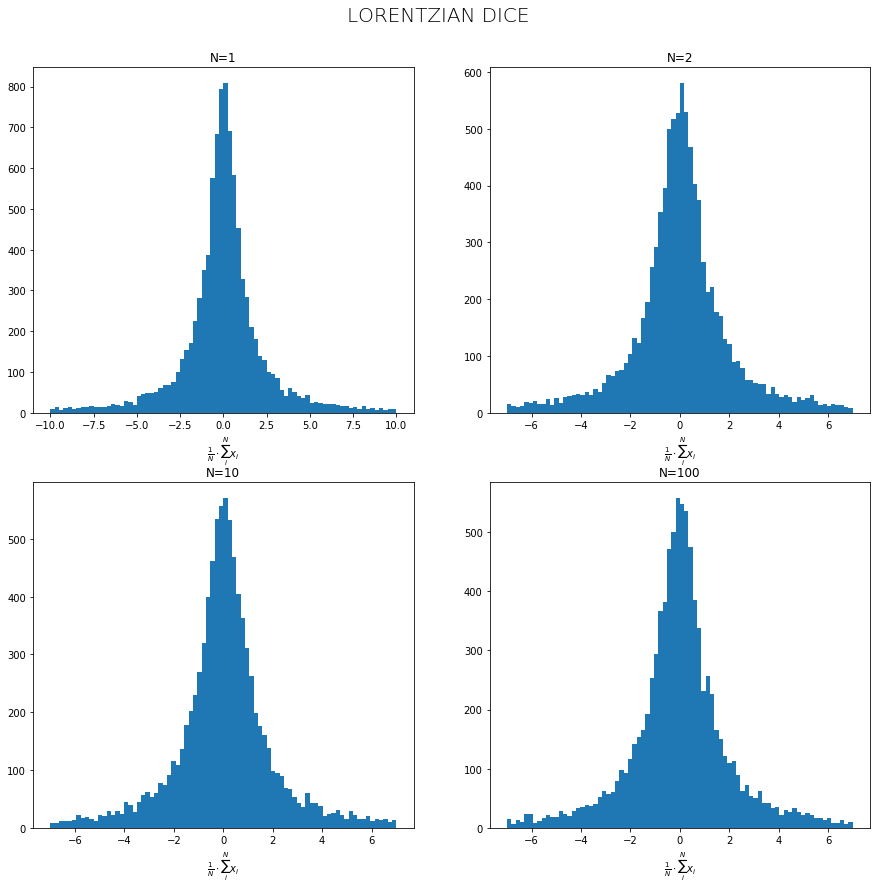

In [7]:
L1,L2, L10, L100 = np.loadtxt('Es01.2.3.res', usecols=(0,1,2,3), unpack='true')

fig = plt.figure(figsize=(15, 14))
fig.suptitle('LORENTZIAN DICE', y='0.94', size='20', weight='20')
gs = gridspec.GridSpec(2, 2, figure=fig)

n_bins=80
ax1 = fig.add_subplot(gs[0,0])
ax1.hist(L1, n_bins, range=[-10,10])
ax1.set_title('N=1')
#axes[0,0].set(xlim=[-100,100])
ax1.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

ax2 = fig.add_subplot(gs[0,1])
ax2.hist(L2, n_bins, range=[-7,7])
ax2.set_title('N=2')
#axes[0,1].set(xlim=[-100,100])
ax2.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

ax3 = fig.add_subplot(gs[1,0])
ax3.hist(L10, n_bins,  range=[-7,7])
ax3.set_title('N=10')
#axes[1,0].set(xlim=[-100,100])
ax3.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

ax4 = fig.add_subplot(gs[1,1])
ax4.hist(L100, n_bins,  range=[-7,7])
ax4.set_title('N=100')
#axes[1,1].set(xlim=[-100,100])
ax4.set_xlabel(r'$\frac{1}{N} \cdot \sum_i^N x_i$')

plt.show()

Gli istogrammi sovrastanti sono una prova del **Teorema del Limite Centrale**: *la somma di N variabili $x_i$ random indipendenti e distribuite in modo identico obbedisce alla distribuzione gaussiana nel limite di $ N\to \infty$ se il primo e il secondo momento della variabile x non divergono.*


All'aumentare del numero N di lanci la somma di eventi a distribuzione di probabilità uniforme ed esponenziale tende a una distribuzione normale. La distribuzione di Cauchy-Lorentz, invece, converge alla rispettiva funzione di distribuzione attrattice (la medesima Lorentziana).

Ho effettuato dei fit con distribuzioni gaussiane e di Cauchy-Lorentz peri  rispettivi istogrammi normalizzati di $S_{100}$.

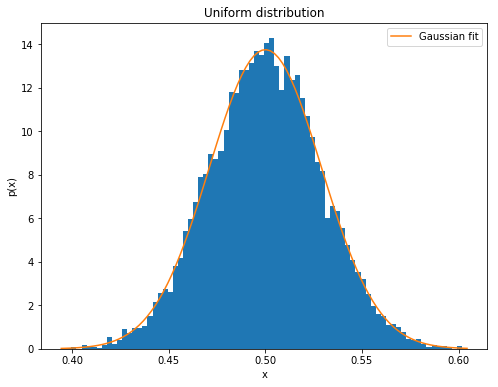

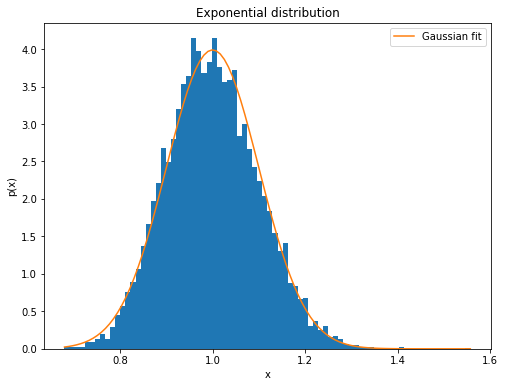

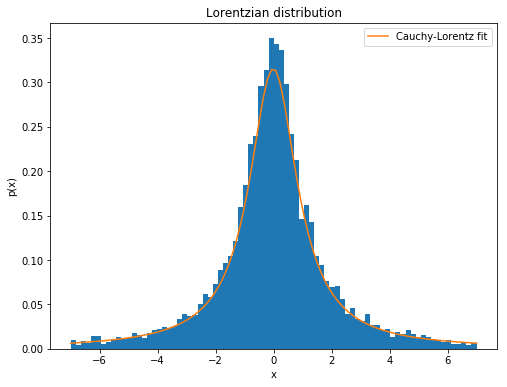

In [9]:
from scipy import stats  

def f(x,avg,std):  # defining the fitting function
    return 1.0/np.sqrt(2*np.pi*(std**2))*np.exp(-0.5*(x-avg)**2/(std**2))
def f1(x,x0,g):  # defining the fitting function
    return g/(np.pi*((x-x0)**2+g**2))

#UNIFORM
plt.figure(figsize=(8,6))
plt.hist(S100, n_bins, density='true')
avg,std =stats.norm.fit(S100)
x = np.linspace(np.min(S100),np.max(S100),100)
plt.plot(x,f(x,avg,std), label='Gaussian fit')
plt.ylabel(r'p(x)')
plt.xlabel(r'x')
plt.title('Uniform distribution')
plt.legend()
plt.show()

#EXP
plt.figure(figsize=(8,6))
plt.hist(E100, n_bins, density='true')
avg,std =stats.norm.fit(E100)
x = np.linspace(np.min(E100),np.max(E100),100)
plt.plot(x,f(x,avg,std), label='Gaussian fit')
plt.ylabel(r'p(x)')
plt.xlabel(r'x')
plt.title('Exponential distribution')
plt.legend()

plt.show()

#LORENTZ
plt.figure(figsize=(8,6))
plt.hist(L100, n_bins, density='true', range=[-7,7])
x0,g =stats.cauchy.fit(L100)
x = np.linspace(-7,7,100)
plt.plot(x,f1(x,x0,g), label='Cauchy-Lorentz fit')
plt.ylabel(r'p(x)')
plt.xlabel(r'x')
plt.title('Lorentzian distribution')
plt.legend()


plt.show()

## <span style="color:blue">  Esercizio 01.3</span>


Ho simulato l'**esperimento di Buffon** che constiste nello stimare il valore di $\pi$ a partire dall'osservazione del lancio di molte barrette su un piano dotato di righe equidistanti. Il valore di $\pi$ è quindi dato da:
$$\pi=\frac{2L}{Pd}=\lim_{N_{th}\to\infty}\frac{2LN_{th}}{N_{hit}d}$$
Ho eseguito un esperimento costituito complessivamnete da $N=10^7$ lanci, suddivisi in 100 blocchi per lo studio dell'incertezza attraverso la media a blocchi, di una barretta lunga $L=8$ e su righe distanti $d=15$.

Ogni lancio della berretta è stata simulata estraendo una coordinata casuale del centro $c\in [0,d]$ e un angolo $a\in [0,\pi]$; per l'estrazione dell'angolo senza l'utilizzo di $\pi$ ho utilizzato un metodo di rigetto estraendo due coordinate $(x,y)$ nella semi-circonferenza unitaria superiore e associando l'angolo $$a=cos^{-1}\left(\frac{x}{\sqrt{x^2+y^2}}\right)$$
Ho infine calcolato le quote dell'estremo superiore e inferiore della barretta incrementando il $N_{hit}$ se $y_{up} >= d$ oppure $y_{down} \leq 0$.

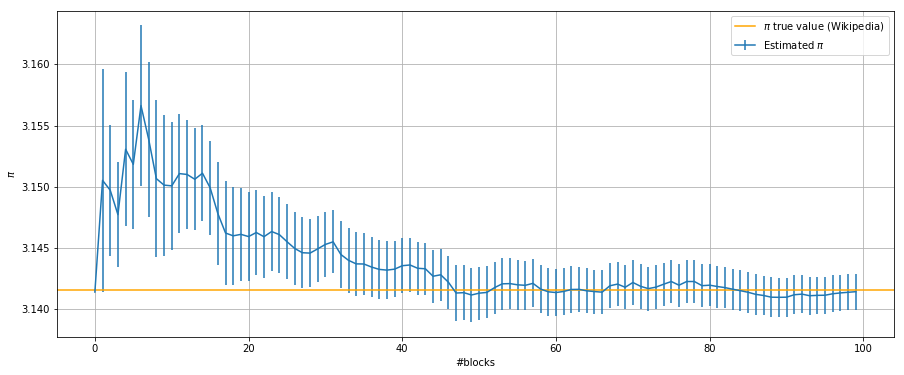

In [10]:
n, pi, err = np.loadtxt('Es01.3.res', usecols=(0,1,2), unpack='true')
plt.figure(figsize=(15,6))
plt.axhline(y=3.14159265, xmin=0, xmax=100, label="$\pi$ true value (Wikipedia)", color="orange")
plt.errorbar(n,pi,yerr=err, label="Estimated $\pi$")
plt.xlabel("#blocks")
plt.ylabel("$\pi$")
plt.grid(True)
plt.legend()
plt.show()

La convergenza statatistica con il valore vero è ottima.